## 空き家問題

https://www.e-stat.go.jp/dbview?sid=0003355276  

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [31]:
df = pd.read_csv("/content/drive/MyDrive/空き家/FEH_00200522_230330202410.csv", encoding = "shift-jis")

In [73]:
df

,表章項目 コード,表章項目,時間軸(年次) コード,時間軸(年次),地域 コード,地域,/居住世帯の有無,総数,居住世帯あり,同居世帯なし,...,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
0,01-2018,住宅数【戸】,2018000000,2018年,0,全国,NaN,"62,407,400","53,616,300","53,330,100",...,"8,791,100","216,700","8,488,600","381,000","260,800","120,100","4,327,200","293,200","3,487,200","85,800"
1,01-2018,住宅数【戸】,2018000000,2018年,1000,北海道,NaN,"2,807,200","2,416,700","2,400,700",...,"390,500","5,200","379,800","8,900","5,000","4,000","204,600","9,000","157,300","5,500"
2,01-2018,住宅数【戸】,2018000000,2018年,1100,札幌市,NaN,"1,051,400","920,900","914,300",...,"130,500","1,200","125,400","2,100",900,"1,200","76,100","2,900","44,300","3,900"
3,01-2018,住宅数【戸】,2018000000,2018年,2000,青森県,NaN,"592,400","501,500","498,300",...,"91,000","1,700","88,700","2,200","1,100","1,100","39,200","1,400","45,800",600
4,01-2018,住宅数【戸】,2018000000,2018年,3000,岩手県,NaN,"579,300","483,600","481,800",...,"95,700","1,800","93,500","3,500","2,000","1,600","38,600","1,100","50,200",500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,01-2018,住宅数【戸】,2018000000,2018年,43100,熊本市,NaN,"362,100","317,100","315,300",...,"45,000",900,"43,500",500,100,300,"24,900","1,300","16,900",700
65,01-2018,住宅数【戸】,2018000000,2018年,44000,大分県,NaN,"581,800","481,800","480,300",...,"100,000","1,700","97,700","4,800","3,200","1,500","42,100","2,100","48,700",600
66,01-2018,住宅数【戸】,2018000000,2018年,45000,宮崎県,NaN,"546,400","460,200","458,100",...,"86,200","1,600","84,200","1,500",400,"1,000","30,900","2,000","49,900",400
67,01-2018,住宅数【戸】,2018000000,2018年,46000,鹿児島県,NaN,"879,400","709,000","705,000",...,"170,400","1,900","167,000","4,200","2,500","1,700","53,600","3,900","105,200","1,500"


In [53]:
df1 = df.iloc[1:, 8:]

In [37]:
df1

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,"2,416,700","2,400,700","16,000","390,500","5,200","379,800","8,900","5,000","4,000","204,600","9,000","157,300","5,500"
2,"920,900","914,300","6,600","130,500","1,200","125,400","2,100",900,"1,200","76,100","2,900","44,300","3,900"
3,"501,500","498,300","3,200","91,000","1,700","88,700","2,200","1,100","1,100","39,200","1,400","45,800",600
4,"483,600","481,800","1,800","95,700","1,800","93,500","3,500","2,000","1,600","38,600","1,100","50,200",500
5,"953,600","950,000","3,500","135,700","3,400","130,500","3,700","2,000","1,800","72,700","3,600","50,400","1,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"317,100","315,300","1,800","45,000",900,"43,500",500,100,300,"24,900","1,300","16,900",700
65,"481,800","480,300","1,500","100,000","1,700","97,700","4,800","3,200","1,500","42,100","2,100","48,700",600
66,"460,200","458,100","2,100","86,200","1,600","84,200","1,500",400,"1,000","30,900","2,000","49,900",400
67,"709,000","705,000","4,000","170,400","1,900","167,000","4,200","2,500","1,700","53,600","3,900","105,200","1,500"


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 1 to 68
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   居住世帯あり   68 non-null     object
 1   同居世帯なし   68 non-null     object
 2   同居世帯あり   68 non-null     object
 3   居住世帯なし   68 non-null     object
 4   一時現在者のみ  68 non-null     object
 5   空き家      68 non-null     object
 6   二次的住宅    68 non-null     object
 7   別荘       68 non-null     object
 8   その他      68 non-null     object
 9   賃貸用の住宅   68 non-null     object
 10  売却用の住宅   68 non-null     object
 11  その他の住宅   68 non-null     object
 12  建築中      68 non-null     object
dtypes: object(13)
memory usage: 7.0+ KB


In [54]:
df1 = df1.replace(',', '', regex=True)
df1 = df1.replace('-', 0, regex=True)
df1.astype(int)

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,317100,315300,1800,45000,900,43500,500,100,300,24900,1300,16900,700
65,481800,480300,1500,100000,1700,97700,4800,3200,1500,42100,2100,48700,600
66,460200,458100,2100,86200,1600,84200,1500,400,1000,30900,2000,49900,400
67,709000,705000,4000,170400,1900,167000,4200,2500,1700,53600,3900,105200,1500


In [55]:
x = df1.drop('空き家', axis=1)
y = df1['空き家']

In [70]:
y

1     379800
2     125400
3      88700
4      93500
5     130500
       ...  
64     43500
65     97700
66     84200
67    167000
68     67900
Name: 空き家, Length: 68, dtype: object

データ分割

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

学習

In [63]:
reg = RandomForestRegressor()

In [64]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
y_pred_reg = reg.predict(x_test)

In [77]:
r2_score(y_test, y_pred_reg)

0.8838561702612491

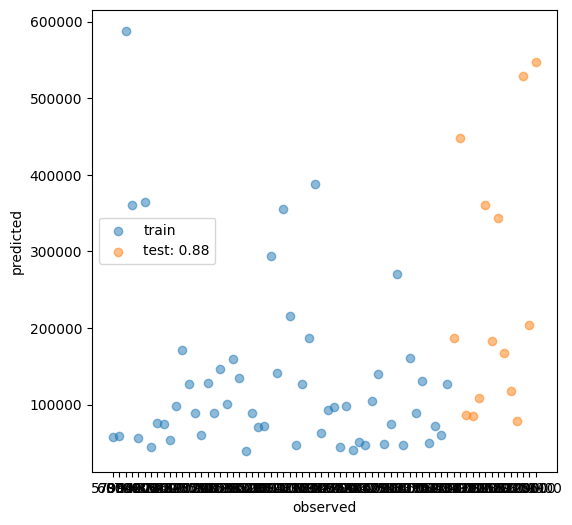

In [78]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, reg.predict(x_train), alpha = 0.5, label = "train")
plt.scatter(y_test, y_pred_reg, alpha = 0.5, label = "test: %.2f" %r2_score(y_test, y_pred_reg))
plt.xlabel("observed")
plt.ylabel("predicted")
plt.legend()

In [80]:
lr = LogisticRegression()

In [81]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred_lr = lr.predict(x_test)

In [83]:
r2_score(y_test, y_pred_lr)

-1.192560967118327

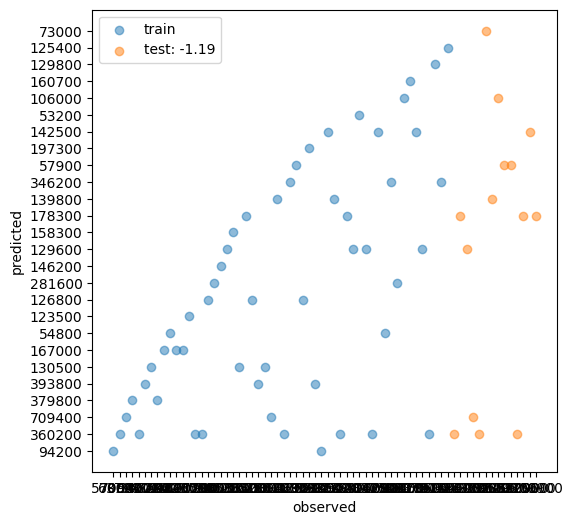

In [85]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, lr.predict(x_train), alpha = 0.5, label = "train")
plt.scatter(y_test, y_pred_lr, alpha = 0.5, label = "test: %.2f" %r2_score(y_test, y_pred_lr))
plt.xlabel("observed")
plt.ylabel("predicted")
plt.legend()